In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale


In [2]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.shape

(50, 5)

In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [6]:
scaled_features = norm_func(df.iloc[:,1:])
scaled_features.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [7]:
scaled_features.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

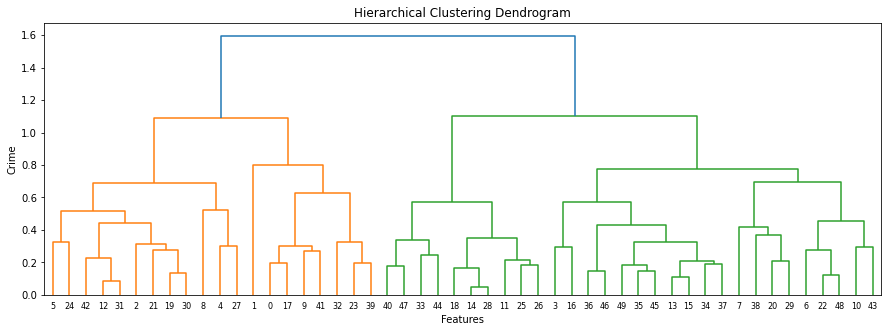

In [9]:
z = linkage(scaled_features, method="complete",metric="euclidean")

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  
    leaf_font_size=8.,  
)
plt.show()


In [11]:
corr = df.corr()

<AxesSubplot:>

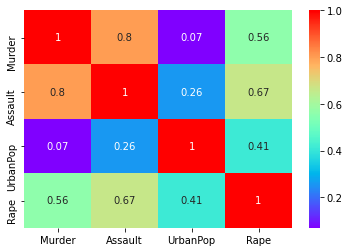

In [12]:
sns.heatmap(corr, annot=True, cmap='rainbow')

**Finding K**
- by ELBOW METHOD

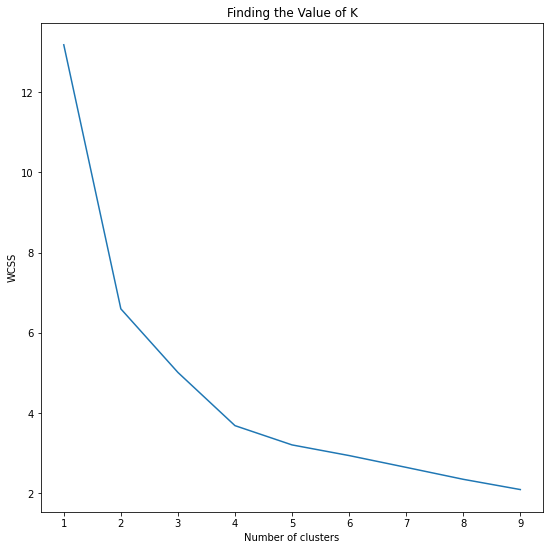

In [13]:
plt.figure(figsize=(9,9))
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10),wcss)
plt.title('Finding the Value of K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
model = KMeans(n_clusters=4)
model.fit(scaled_features)

KMeans(n_clusters=4)

In [15]:
model.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [16]:
x = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  
clusters.fit(x)
clusters.cluster_centers_
clusters.labels_
df['CrimeRate_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['CrimeRate_clusters'],ascending = True)
x.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [17]:
stats =df.sort_values("Murder", ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,CrimeRate_clusters
33,North Dakota,0.8,45,44,7.3,3
28,New Hampshire,2.1,57,56,9.5,3
18,Maine,2.1,83,51,7.8,3
14,Iowa,2.2,56,57,11.3,3
44,Vermont,2.2,48,32,11.2,3
48,Wisconsin,2.6,53,66,10.8,3
11,Idaho,2.6,120,54,14.2,1
22,Minnesota,2.7,72,66,14.9,3
43,Utah,3.2,120,80,22.9,1
6,Connecticut,3.3,110,77,11.1,1


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


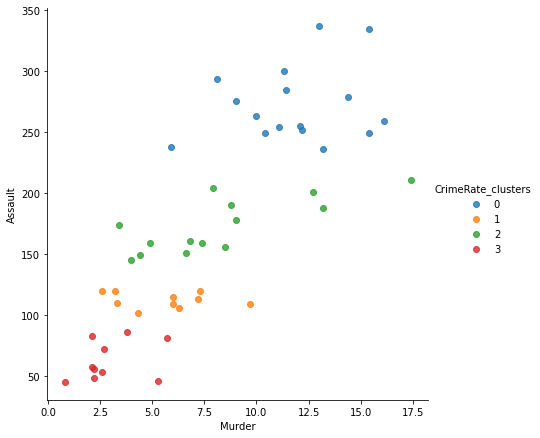

In [18]:
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'CrimeRate_clusters',
        fit_reg=False, size = 6 );